In [1]:
"""

[env]
conda create --name streamlit_spacy_1 python=3.9.7
conda info --envs
source activate streamlit_spacy_1
conda deactivate

[path]
cd /Users/brunoflaven/Documents/01_work/blog_articles/streamlit_eda_made_easy/tedious_manual_eda/

[file]
jupyter notebook

[source]
https://github.com/StephenFordham
https://towardsdatascience.com/exploring-a-data-set-with-simple-pandas-and-plot-visualizations-features-73901ee76c6c


"""
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

# personal configuration
import config_values.values_conf as conf

### 1. VALUES ###
CVS_FILE_PATH = conf.CVS_FILE_PATH


def load_csv():
    csv = pd.read_csv(CVS_FILE_PATH)
    return csv


In [2]:
## just to let you know the version
for p in [pd, np, sns]:
    print(f'{p.__name__:-<30}v{p.__version__}')

pandas------------------------v1.3.4
numpy-------------------------v1.21.2
seaborn-----------------------v0.11.2


In [3]:
# SIMPLE EXPLORATION
# print("\n--- 1. SIMPLE EXPLORATION")

### 1. SIMPLE EXPLORATION

In [4]:
# dataset
df = load_csv()
df

,Tennis_Player,Total_Weeks_at_No_1,Maximum_Consectutive_Weeks_at_no_1,Years_End_no_1,Careers_Wins_Losses,Titles,Prize_Money,Unnamed: 7
0,Roger Federer,310,237,5,1222-265,102,126266005,NaN
1,Pete Sampras,286,102,6,762-222,64,43280489,NaN
2,Ivan Lendl,270,157,4,1068-242,94,21262417,NaN
3,Jimmy Connors,268,160,5,1274-282,109,8641040,NaN
4,Novak Djokovic,264,122,5,871-182,75,134684000,NaN
5,Rafael Nadal,196,56,4,960-196,83,111328858,NaN
6,John McEnroe,170,58,4,881-198,77,12552132,NaN
7,Bjorn Borg,109,46,2,644-135,64,3655751,NaN
8,Andre Agassi,101,52,1,870-274,60,31152975,NaN
9,Lleyton Hewitt,80,75,2,616-262,30,20879934,NaN


In [5]:
# columns
df.columns

Index(['Tennis_Player', 'Total_Weeks_at_No_1',
       'Maximum_Consectutive_Weeks_at_no_1', 'Years_End_no_1',
       'Careers_Wins_Losses', 'Titles', 'Prize_Money', 'Unnamed: 7'],
      dtype='object')

In [6]:
# shape
df.shape

(26, 8)

In [7]:
# non_available
df.isna().sum()

Tennis_Player                          0
Total_Weeks_at_No_1                    0
Maximum_Consectutive_Weeks_at_no_1     0
Years_End_no_1                         0
Careers_Wins_Losses                    0
Titles                                 0
Prize_Money                            0
Unnamed: 7                            26
dtype: int64

In [8]:
# types
df.dtypes

Tennis_Player                          object
Total_Weeks_at_No_1                     int64
Maximum_Consectutive_Weeks_at_no_1      int64
Years_End_no_1                          int64
Careers_Wins_Losses                    object
Titles                                  int64
Prize_Money                             int64
Unnamed: 7                            float64
dtype: object

In [9]:
# PLAYING WITH COLUMNS
# print("\n--- PLAYING WITH COLUMNS")

### 2. PLAYING WITH COLUMNS


In [10]:
df[['Careers_Wins', 'Careers_Losses']] = df.Careers_Wins_Losses.str.split('-', expand=True).astype(float)
df[['Tennis_Player', 'Careers_Wins_Losses', 'Careers_Wins', 'Careers_Losses']].head()

,Tennis_Player,Careers_Wins_Losses,Careers_Wins,Careers_Losses
0,Roger Federer,1222-265,1222.0,265.0
1,Pete Sampras,762-222,762.0,222.0
2,Ivan Lendl,1068-242,1068.0,242.0
3,Jimmy Connors,1274-282,1274.0,282.0
4,Novak Djokovic,871-182,871.0,182.0


In [11]:
# Who is the Best Former World Number 1?

df['Total_Professional_matches'] = df.Careers_Wins + df.Careers_Losses
df['Win_Percentage'] = (df.Careers_Wins / df.Total_Professional_matches) * 100


# DEBUG
# Total_Professional_matches = df['Total_Professional_matches'] = df.Careers_Wins + df.Careers_Losses
# Win_Percentage = df['Win_Percentage'] = (df.Careers_Wins / df.Total_Professional_matches) * 100

# Total_Professional_matches
# Win_Percentage


df[['Tennis_Player', 'Total_Professional_matches', 'Win_Percentage']].sort_values('Win_Percentage', ascending=False).head(10)




,Tennis_Player,Total_Professional_matches,Win_Percentage
5,Rafael Nadal,1156.0,83.044983
4,Novak Djokovic,1053.0,82.716049
7,Bjorn Borg,779.0,82.670090
0,Roger Federer,1487.0,82.178884
3,Jimmy Connors,1556.0,81.876607
6,John McEnroe,1079.0,81.649676
2,Ivan Lendl,1310.0,81.526718
13,Andy Murray,854.0,77.634660
1,Pete Sampras,984.0,77.439024
17,Boris Becker,927.0,76.914779


#### Sorting Multiple Columns

In [12]:
#### Sorting Multiple Columns
df[['Tennis_Player', 'Years_End_no_1', 'Win_Percentage']].sort_values(['Years_End_no_1','Win_Percentage'], ascending=False).head(10)


,Tennis_Player,Years_End_no_1,Win_Percentage
1,Pete Sampras,6,77.439024
4,Novak Djokovic,5,82.716049
0,Roger Federer,5,82.178884
3,Jimmy Connors,5,81.876607
5,Rafael Nadal,4,83.044983
6,John McEnroe,4,81.649676
2,Ivan Lendl,4,81.526718
7,Bjorn Borg,2,82.670090
10,Stefan Edberg,2,74.789916
9,Lleyton Hewitt,2,70.159453


In [13]:
# Percentage difference between each Player
Tennis_Win_Perc = df.sort_values('Win_Percentage', ascending=False)
Tennis_Win_Perc['Percent_diff'] = Tennis_Win_Perc.Win_Percentage.pct_change() * 100
Tennis_Win_Perc['Percent_diff'] = Tennis_Win_Perc.Percent_diff.fillna(0)
Tennis_Win_Perc[['Tennis_Player', 'Win_Percentage', 'Percent_diff']].head(10)


,Tennis_Player,Win_Percentage,Percent_diff
5,Rafael Nadal,83.044983,0.000000
4,Novak Djokovic,82.716049,-0.396091
7,Bjorn Borg,82.670090,-0.055563
0,Roger Federer,82.178884,-0.594176
3,Jimmy Connors,81.876607,-0.367828
6,John McEnroe,81.649676,-0.277162
2,Ivan Lendl,81.526718,-0.150592
13,Andy Murray,77.634660,-4.773965
1,Pete Sampras,77.439024,-0.251996
17,Boris Becker,76.914779,-0.676978


In [14]:
# Filtering with Easy Readability
# https://gist.github.com/StephenFordham?page=10


# 'Tennis_Player', 'Total_Weeks_at_No_1', 'Maximum_Consectutive_Weeks_at_no_1', 'Years_End_no_1','Careers_Wins_Losses', 'Titles', 'Prize_Money'

crit1 = df.Maximum_Consectutive_Weeks_at_no_1 > 30
crit2 = df.Titles > 80
crit3 = df.Prize_Money < 100000000
df[crit1 & crit2 & crit3].loc[:, ['Tennis_Player']]

,Tennis_Player
2,Ivan Lendl
3,Jimmy Connors


In [15]:

# using a reduce function porduce the same effect
from functools import reduce
criteria = reduce(lambda x, y: x & y, [crit1, crit2, crit3])
df[criteria].loc[:, ['Tennis_Player']]




,Tennis_Player
2,Ivan Lendl
3,Jimmy Connors


<AxesSubplot:ylabel='Tennis_Player'>

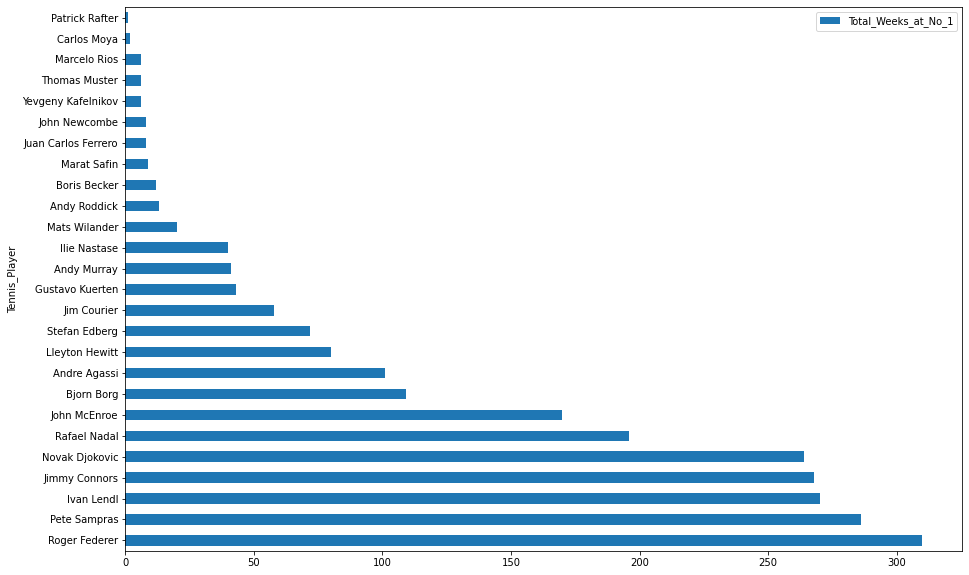

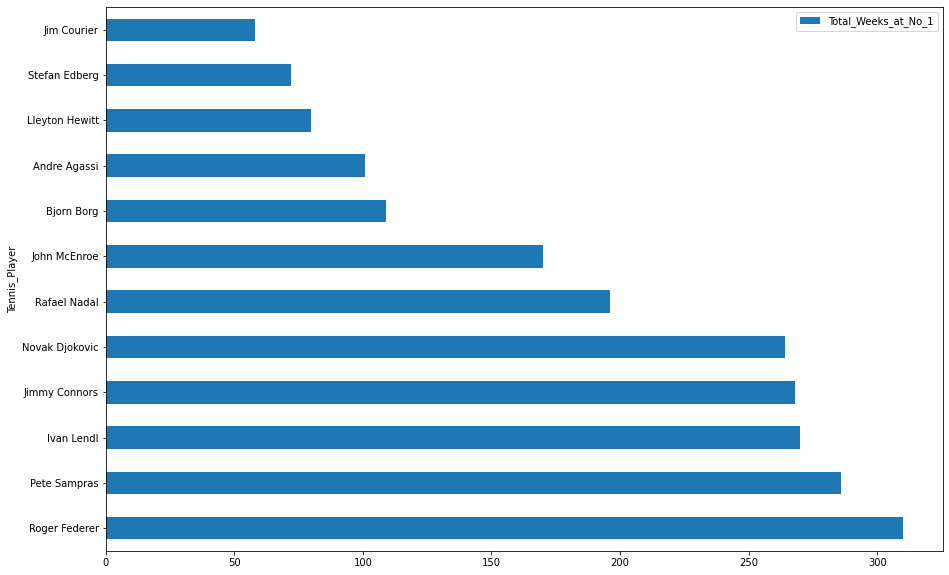

In [16]:
# Visualize the Data
# do not forget to import matplotlib.pyplot as plt

# Quick inspection of the data
df.plot.barh(x='Tennis_Player', 
                y= 'Total_Weeks_at_No_1',
                figsize = (15, 10),
               )

# Filtering the output, weeks at no 1 greater than 50 will only be shown.
df[df.Total_Weeks_at_No_1 > 50].plot.barh(x='Tennis_Player', 
                                                y= 'Total_Weeks_at_No_1',
                                                figsize = (15, 10),
                                               )


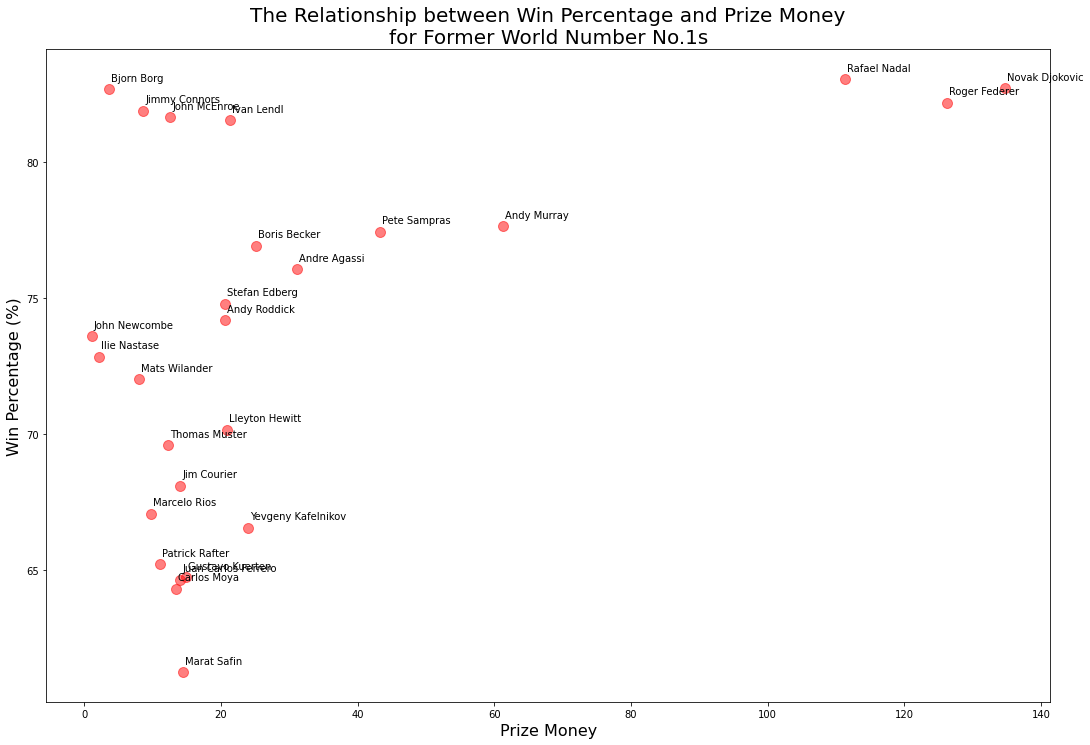

In [17]:
# Informative Scatter Plots


df['Earnings'] = Tennis_Win_Perc.Prize_Money / 10**6


tennis_players = list(df.Tennis_Player)
x_coords = list(df.Earnings)
y_coords = list(df.Win_Percentage)

plt.figure(figsize=(18, 12))

for i, player in enumerate(tennis_players):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='o', color='red', alpha=0.5, s=100)
    
    plt.text(x+0.3, y+0.3, player, fontsize=10)
    

plt.title('The Relationship between Win Percentage and Prize Money\nfor Former World Number No.1s', fontsize=20)
plt.ylabel('Win Percentage (%)', fontsize=16)
plt.xlabel('Prize Money', fontsize=16)
plt.show()
